<a href="https://colab.research.google.com/github/Timecapp/FourthAssignments/blob/main/midterm_fourthbrain_shai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **FOURTHBRAIN MIDTERM ASSIGNMENT**
MLE 10 Cohort

> **Dr. Shaista Hussain**



Deliverables:
- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells)  

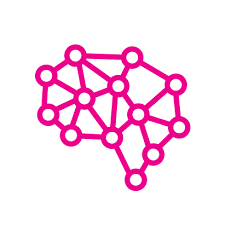

> # **INTRODUCTIONS**

# Dataset Description
 
- 84.5% (10,422) were negative class samples that did not end with shopping

- (1908) were positive class samples ending with shopping

- Data Set Characteristics:  Multivariate

- Number of Instances/Sessions: 12330

- Area: Business

- Attribute Characteristics: Integer, Real

- Number of Attributes: 18

- Date Donated: 2018-08-31

- Associated Tasks: Classification, Clustering

- Missing Values? N/A

(Sakar et al., 2018)

> # **START TASK 1**

**Task 1. Classification (50 points)**
- Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set.

- Fit a logistic regression and at least one other classification model. 

- Find and explain important features.

- Report and interpret the most meaningful classifications metrics

- Show and explain the hyper-parameter fitting process.

**Point breakdown:**

(10 points) Basic exploratory data analysis (EDA)
Appropriate univariate descriptive statistics and figures
Appropriate bi-variate descriptive statistics and figures
( 5 points) Advanced EDA
Free-response, shows us what they know!
( 5 points) Train/test split
(10 points) Feature selection
(15 points) Model fitting
( 5 points) Performance points


# Loading Dataset

In [57]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#import resources and then define the datase and print 
import pandas as pd
import io
df = pd.read_csv('/content/drive/MyDrive/4thbrain/online_shoppers_intention.csv')
print(df)


       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

# Basic exploratory data analysis (EDA)
Appropriate univariate and bi-variate descriptive statistics and figures

In [59]:
# check the shape of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

> There are 2 booleans, 7 float64s, 7 int64s and 2 objects

In [61]:
# Describing dataset
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [62]:
# Check missing values
nullcount = df.isnull().sum()
print('Total Null Values in Shopping Dataset:', nullcount.sum())

Total Null Values in Shopping Dataset: 0


In [63]:
# Check unique values per feature

unique = df.nunique(axis=0)
print(unique)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [64]:
# Import Resources for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [65]:
!pip install scipy
!pip install pyspark
# Statistics Resources
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# Scikit Resources
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
#Countplots analysis
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

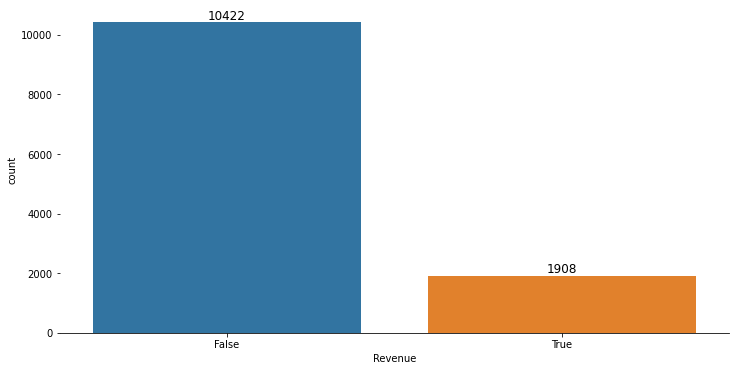



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [67]:
plot_data_count(df, 'Revenue')

> This means that 15.47 % of customers completed a transaction.

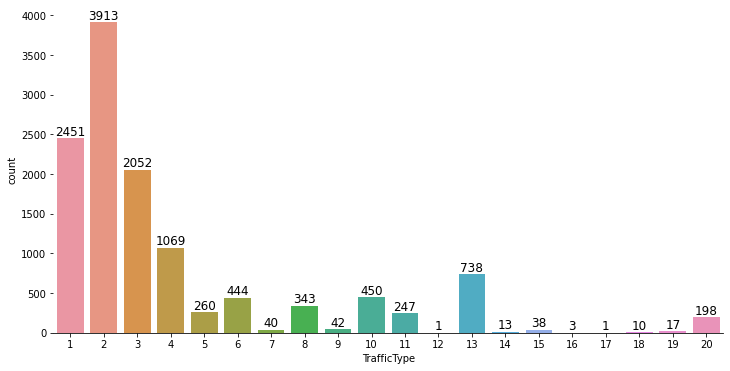



Percent share for each category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [68]:
plot_data_count(df, 'TrafficType')

> * 31.74 % of customers are from traffic type 2  

> * 19.87 % of customers are from traffice type 1

> * 16.64% of customers are from traffic type 3

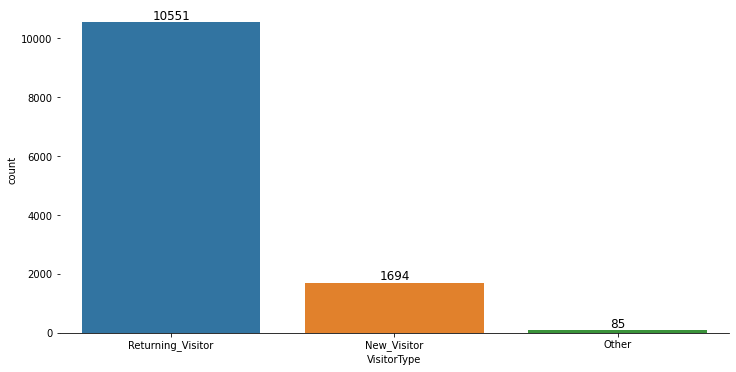



Percent share for each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


In [69]:
df['VisitorType'].value_counts()
plot_data_count(df, 'VisitorType')

> * 85.57 % of customers are returning visitors

> * 13.74% of customers are new (first timers)

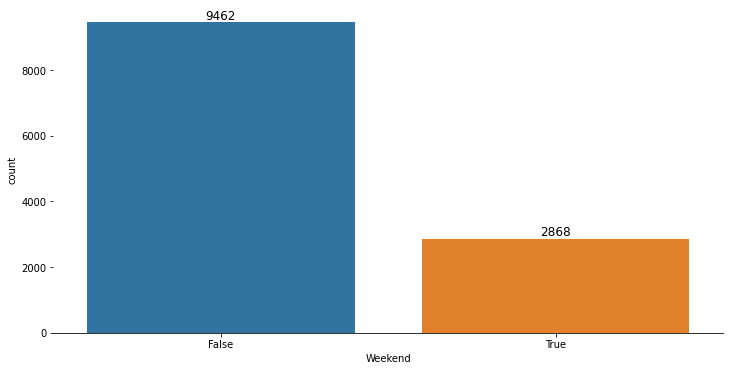



Percent share for each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [70]:
plot_data_count(df, 'Weekend')

> most shopping then occurs during weekdays

In [71]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


> No null or missing values, good to go

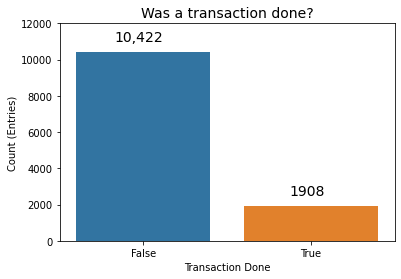

In [72]:
# Visualizing the Dataset

sns.countplot(df['Revenue'])
plt.ylim(0,12000)
plt.title('Was a transaction done?', fontsize= 14)
plt.xlabel('Transaction Done', fontsize=10)
plt.ylabel('Count (Entries)', fontsize=10)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=14)
plt.text(x=.875, y=2500, s='1908', fontsize=14)
plt.show()

> 1908 transactions were completed vs 10,422 not completed.

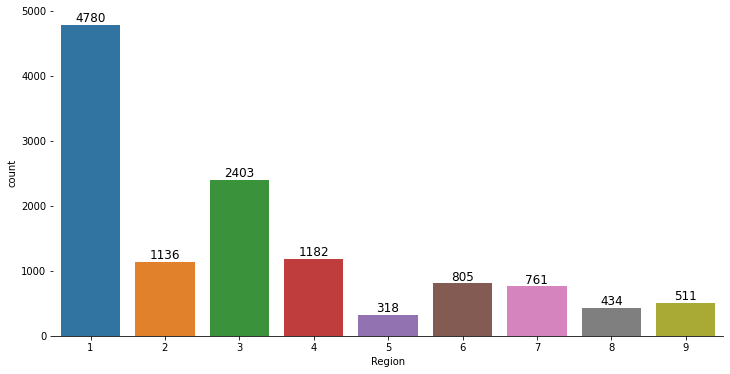



Percent share for each category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


In [73]:
plot_data_count(df, 'Region')

> * 38.77% of customers are from region 1

> * 19.49% of customers are from region 3

> * 9.59% of customers are from region 4

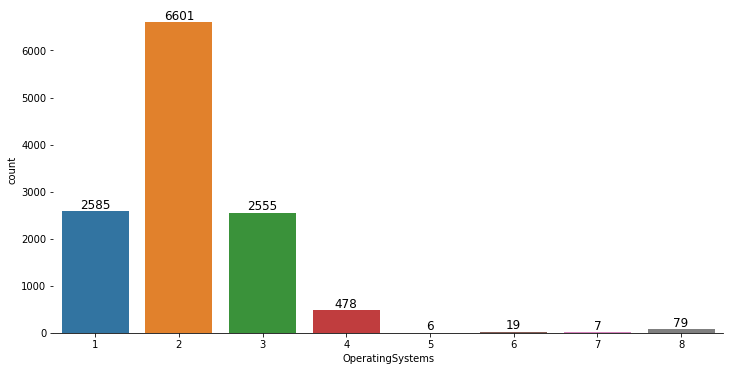



Percent share for each category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


In [74]:
plot_data_count(df, 'OperatingSystems')

> * 53.54 % of customers are using OS 2
> * 20.99 % of customers are using OS 1
> * 20.72% of customers are using OS 3

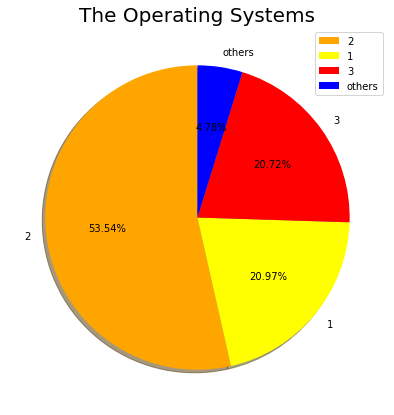

In [75]:
# Operating Systems Visualization

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['orange', 'yellow', 'red', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('The Operating Systems', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> OS Systems 1, 2 and 3 are the majority (95%)  

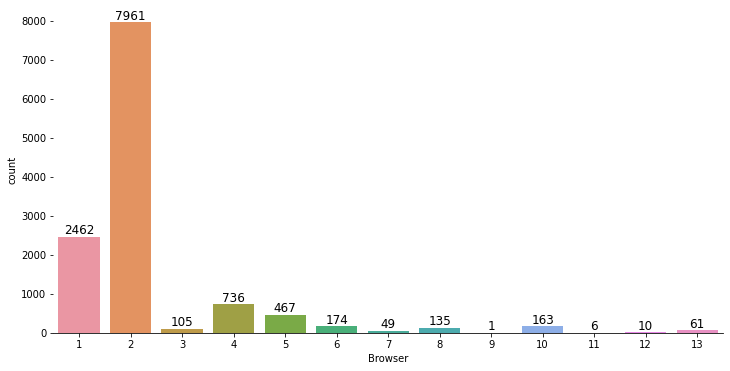



Percent share for each category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


In [76]:
plot_data_count(df, 'Browser')

> * 64.57 % of customers are shopping from browser 2 

> * 19.99 % of customers are from browser 1 

> * 5.99 % of customers are from browser 4 

In [77]:
# browsers numbers
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

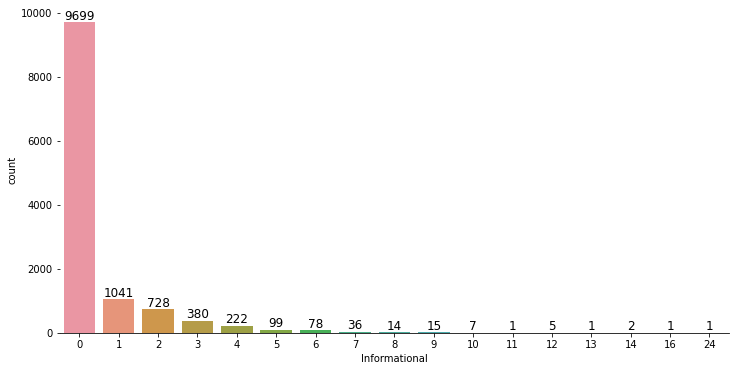



Percent share for each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
16     0.008110
11     0.008110
24     0.008110
13     0.008110
Name: Informational, dtype: float64


In [78]:
plot_data_count(df, 'Informational')

> * 78.67 % (THE MAJORITY) is page 0 

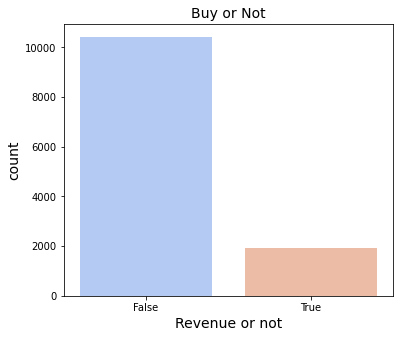

In [79]:
# Check customer distribution on revenue  

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'coolwarm')
plt.title('Buy or Not', fontsize = 14)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

In [80]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

> The top 3 busiest customer months were May, November and March

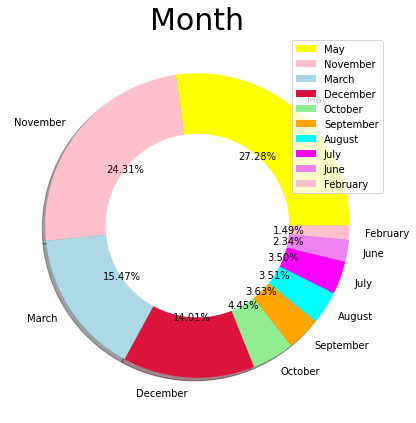

In [81]:
# Changes over months and days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

# Advanced EDA
* Bivariate Analysis


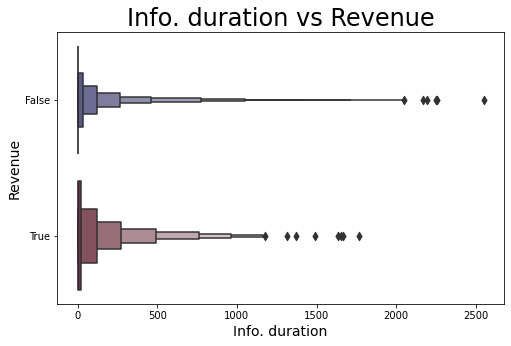

In [82]:
# Info duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['Informational_Duration'], df['Revenue'], palette = 'icefire', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 24)
plt.xlabel('Info. duration', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)

plt.show()

> There are outliers in " not purchased" 

In [83]:
pd.crosstab(df['Informational_Duration'], df['Revenue'])

Revenue,False,True
Informational_Duration,,
0.000000,8582,1343
1.000000,3,0
1.500000,1,0
2.000000,7,4
2.500000,1,0
...,...,...
2166.500000,1,0
2195.300000,1,0
2252.033333,1,0


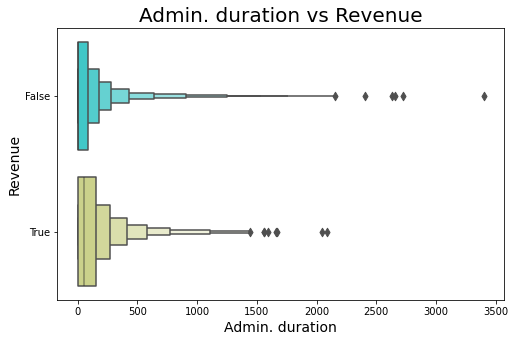

In [84]:
# Admin duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['Administrative_Duration'], df['Revenue'], palette = 'rainbow', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 20)
plt.xlabel('Admin. duration', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.show()

In [85]:
 pd.crosstab(df['Administrative_Duration'], df['Revenue'])

Revenue,False,True
Administrative_Duration,,
0.000000,5355,548
1.333333,1,0
2.000000,13,2
3.000000,22,4
3.500000,4,0
...,...,...
2407.423810,1,0
2629.253968,1,0
2657.318056,1,0


> There are outliers in "not puchased"

There are outliers in not puchased(False) wrt Administrative_Duration

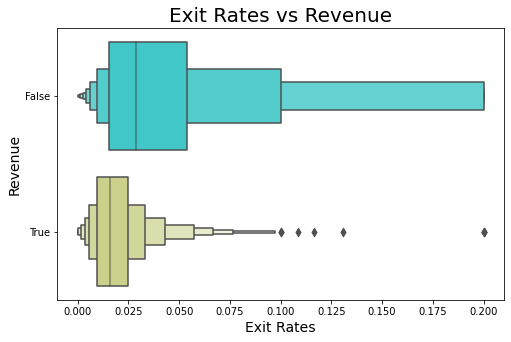

In [86]:
# Exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['ExitRates'], df['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 20)
plt.xlabel('Exit Rates', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.show()

In [87]:
pd.crosstab(df['ExitRates'], df['Revenue'])

Revenue,False,True
ExitRates,,
0.000000,42,34
0.000176,1,0
0.000250,1,0
0.000262,1,0
0.000263,1,0
...,...,...
0.183333,2,0
0.186667,4,0
0.188889,2,0


> Normal distribution and outliers in not puchased(False) wrt ExitRates

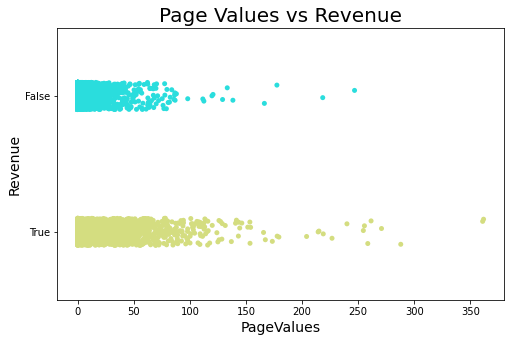

In [88]:
# Page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 20)
plt.xlabel('PageValues', fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.show()

> The Page value contributes to purchases and there are outliers in purchases

In [89]:
pd.crosstab(df['PageValues'], df['Revenue'])

Revenue,False,True
PageValues,,
0.000000,9230,370
0.038035,1,0
0.067050,0,1
0.093547,0,1
0.098621,0,1
...,...,...
261.491286,0,1
270.784693,0,1
287.953793,0,1


> There are  outliers in puchased(True) wrt ExitRates

> PageValues signficantly contributes towards a purchase

> returning visitors buy more

returning visitors appear to buy more

In [90]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [91]:
=pd.crosstab(df['VisitorType'], df['Revenue'])

SyntaxError: ignored

In [92]:
#Checking column spellings
df.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [93]:
 pd.crosstab(df['TrafficType'], df['Revenue'])

Revenue,False,True
TrafficType,,
1,2189,262
2,3066,847
3,1872,180
4,904,165
5,204,56
6,391,53
7,28,12
8,248,95
9,38,4


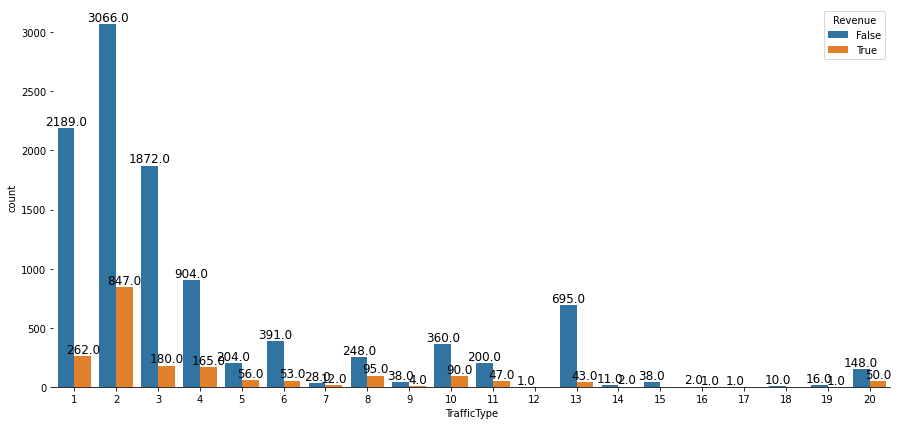

In [94]:
# Traffic Type vs Revenue

plot_data_count(df, col='TrafficType', return_pct_share=False, hue='Revenue', figsize=(15,7))



> Categories 2 then 1 then 3 and 4 are highest for TRUE  (and also for false) 


In [95]:
  pd.crosstab(df['Region'], df['Revenue'])

Revenue,False,True
Region,,
1,4009,771
2,948,188
3,2054,349
4,1007,175
5,266,52
6,693,112
7,642,119
8,378,56
9,425,86


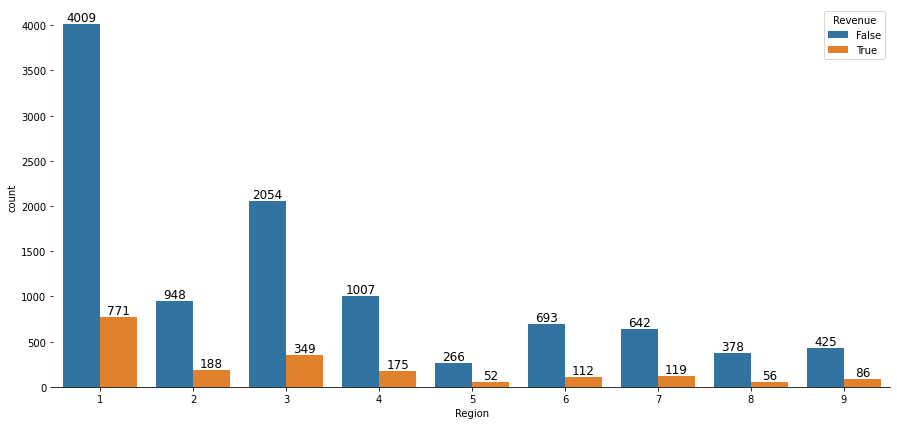

In [106]:
# Region vs Revenue

plot_data_count(df, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))



> Columns 1, 3 then 4 have most TRUE (and also false)

In [97]:
 pd.crosstab(df['Browser'], df['Revenue'])

Revenue,False,True
Browser,,
1,2097,365
2,6738,1223
3,100,5
4,606,130
5,381,86
6,154,20
7,43,6
8,114,21
9,1,0


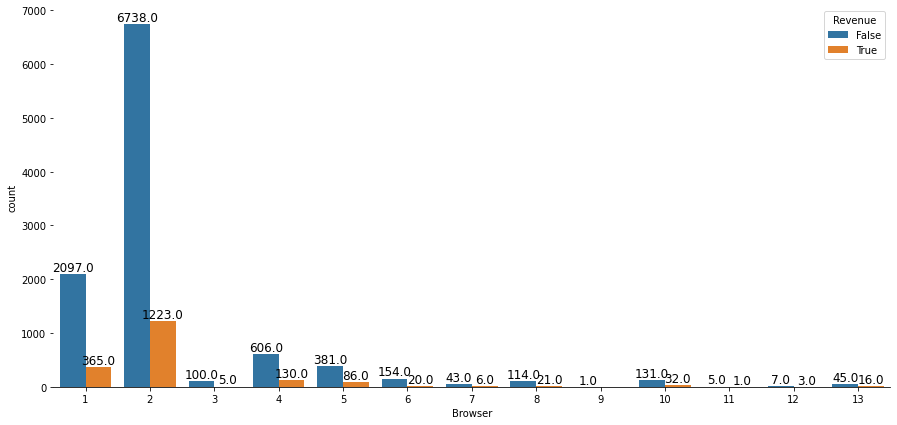

In [107]:
# Browser vs Revenue

plot_data_count(df, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))

> Columns 2 and 1 have most TRUE

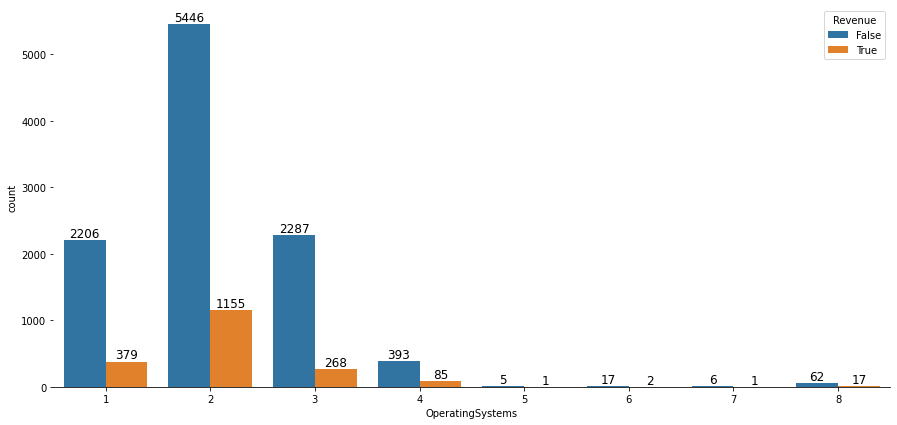

In [108]:
# OperatingSystems vs Revenue

plot_data_count(df, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))


> for OS, columns 2 then 1 then 3 have highest

In [100]:
discrete_features = ['Administrative', 'Informational', 
                     'ProductRelated', 'Month', 
                     'OperatingSystems', 'Browser', 
                     'Region', 'TrafficType', 
                     'VisitorType', 'Weekend']

chi_squared_df = pd.DataFrame(columns=['feature', 'pval', 'dependent'])

for i, col in enumerate(discrete_features):
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    res = stats.chi2_contingency(x.values)
    pval = res[1]
    
    if pval < 0.05:
        dependent = 'Yes'
    else:
        dependent = 'No'
        
    chi_squared_df.loc[i] = [col, round(pval,3), dependent]
    
chi_squared_df

,feature,pval,dependent
0,Administrative,0.000,Yes
1,Informational,0.000,Yes
2,ProductRelated,0.000,Yes
3,Month,0.000,Yes
4,OperatingSystems,0.000,Yes
5,Browser,0.006,Yes
6,Region,0.321,No
7,TrafficType,0.000,Yes
8,VisitorType,0.000,Yes
9,Weekend,0.001,Yes


> Region is independent, the other parameters are dependent with respective pvalues

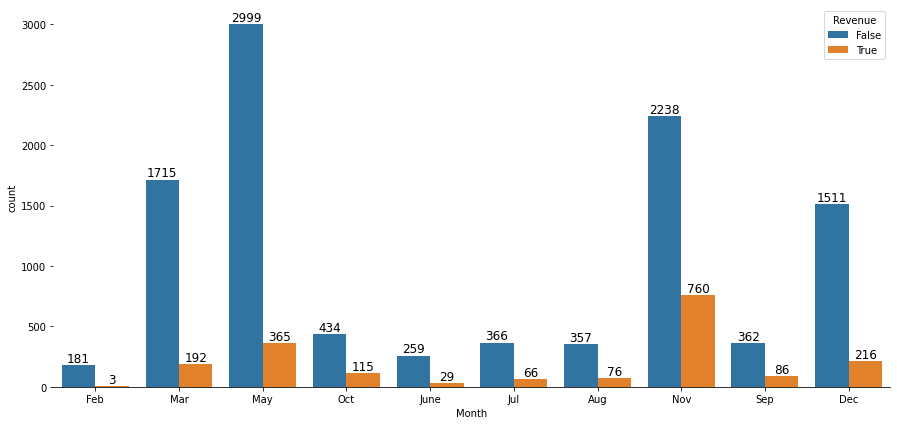

In [101]:
# Month vs Revenue

plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))


> November then May then December have highest TRUE

# Multivariate Analysis

In [102]:
type_of_pages = ['Administrative', 'Informational', 'ProductRelated']

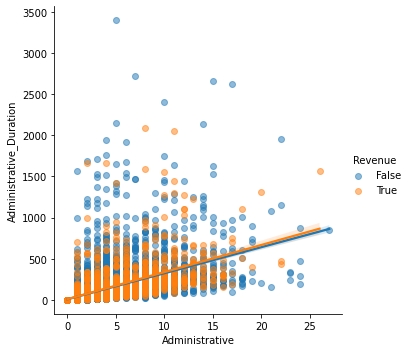

In [103]:
# Administrative Page Views + Administrative Pageview Duration effect on Revenue

sns.lmplot(x="Administrative", y="Administrative_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

> Shows a true association in the impact of Admin page views and page view duration on revenue

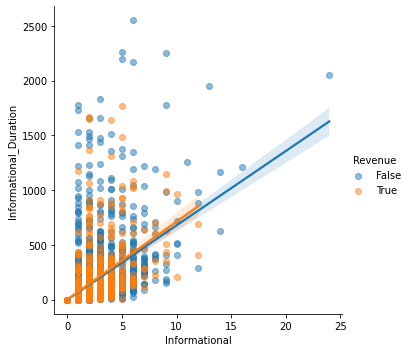

In [104]:
# Information Page Views + Information Pageview Duration vs. Revenue

sns.lmplot(x="Informational", y="Informational_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

> Shows true impact of Information Pages views and view durations on revenue

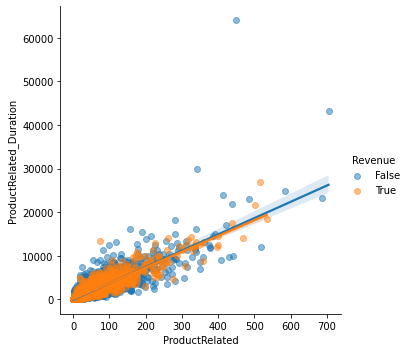

In [114]:
# Impact of ProductRelated Page Views + ProductRelated Pageview Duration vs Revenue

sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

> Shows TRUE impact of Product related pages and view duration on revenue

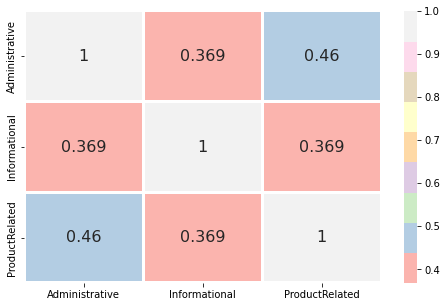

In [115]:
corr_mat = df[type_of_pages].corr(method='spearman')
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

> Heat map for association, Admin and Product Related are highest positive correlation

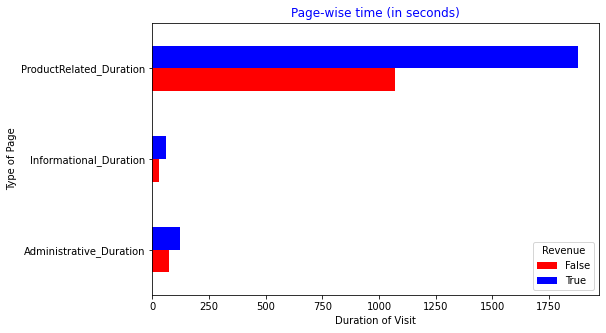

In [116]:
#visualize
pd.pivot_table(df,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',figsize=(8,5),color=['red', 'blue'])
plt.title('Page-wise time (in seconds)',size=12,color='blue')
plt.ylabel('Type of Page')
plt.xlabel('Duration of Visit')
plt.show()

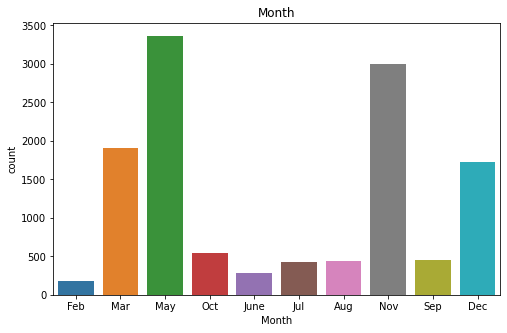

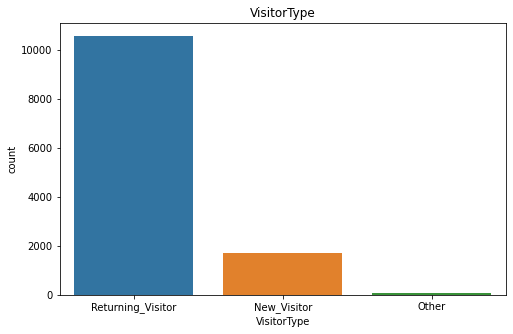

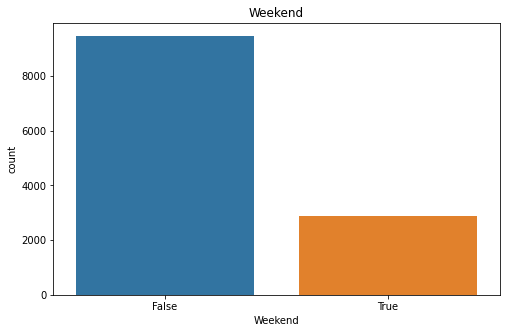

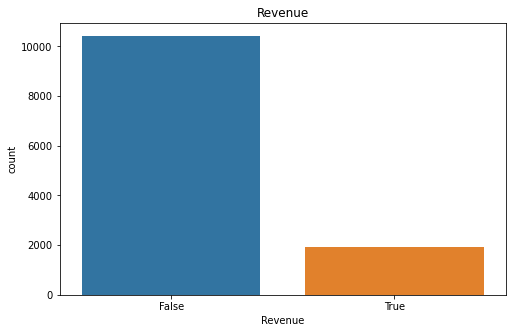

In [117]:
#time visualization
for i in df.select_dtypes(include=['object','bool']).columns:
    sns.countplot(i,data=df)
    plt.title(i)
    plt.show()

> Increased purchases with returning visitors, in May and November, and Traffic type 2, in region 1

In [118]:
#import visualization tool
from mpl_toolkits.mplot3d import Axes3D

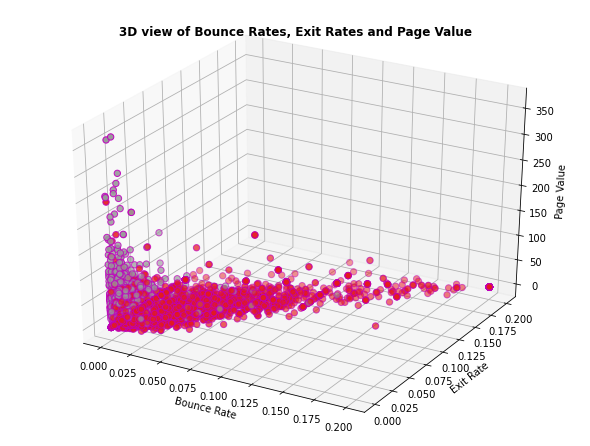

In [119]:
#Visualize Bounce Rates, exit rates and page value
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df['BounceRates'],df['ExitRates'],df['PageValues'],c=df['Revenue'].replace({'Yes':0,'No':1}),
           cmap=plt.cm.Set1, edgecolor='m',s=40)
ax.set_title("3D view of Bounce Rates, Exit Rates and Page Value",fontweight='bold')
ax.set_xlabel("Bounce Rate")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Exit Rate")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Page Value")
#ax.w_zaxis.set_ticklabels([])
plt.show()

In [120]:
#analysis on revenue vs. time
rev_yes_month = df[df['Revenue']=='Yes']['Month'].value_counts()
label = rev_yes_month.index
values = rev_yes_month.values

In [121]:
rev_no_month =  df[df['Revenue']=='No']['Month'].value_counts()

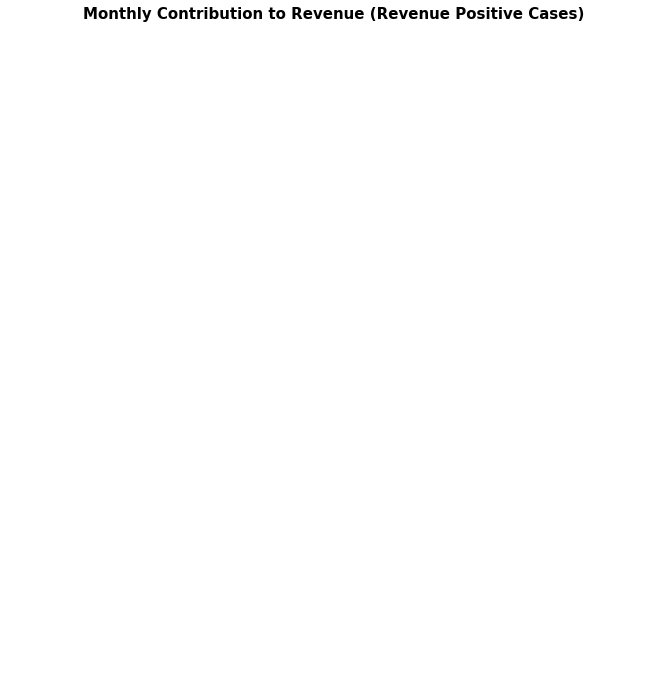

In [122]:
plt.figure(figsize=(20,12))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(rev_yes_month,labels=label,shadow=True,colors=['#f80cf0','#fb2930', '#a2cd5a', '#01cdfe', '#766ec0', '#cd5c5c', '#a28410', '#5e0c1d', '#b967ff', '#bb6969'],autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Monthly Contribution to Revenue (Revenue Positive Cases)',fontweight= 'bold',size=15)
plt.show()

In [123]:
for j in ['OperatingSystems','Browser','Region','TrafficType']:
    reg = round(df[df['Revenue']=='Yes'][j].value_counts(normalize=True)*100,2)
    ind = []
    for i in reg.index:
        i = str(i)
        v = j+' '+i
        ind.append(v)
        v =''

    from plotly import graph_objects as go
    fig = go.Figure(
       go.Funnel(
          y = ind,
          x = reg.values
       )
    )

    fig.update_layout(font_color="black",font=dict(size=9),title={
            'text': "{} (%) with Revenue".format(j),
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()

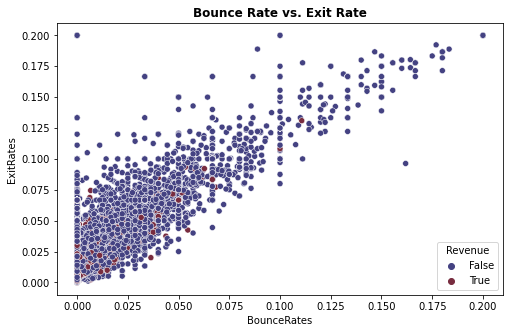

In [124]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='Revenue',palette='icefire')
plt.title('Bounce Rate vs. Exit Rate',fontweight='bold',fontsize=12)
plt.show()



> Higher bounce rates with higher exit rates

In [125]:
for j in ['OperatingSystems','Browser','Region','TrafficType']:
    reg = round(df[df['Revenue']=='Yes'][j].value_counts(normalize=True)*100,2)
    ind = []
    for i in reg.index:
        i = str(i)
        v = j+' '+i
        ind.append(v)
        v =''

    from plotly import graph_objects as go
    fig = go.Figure(
       go.Funnel(
          y = ind,
          x = reg.values
       )
    )

    fig.update_layout(font_color="black",font=dict(size=8),title={
            'text': "{} (%) with Revenue".format(j),
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()

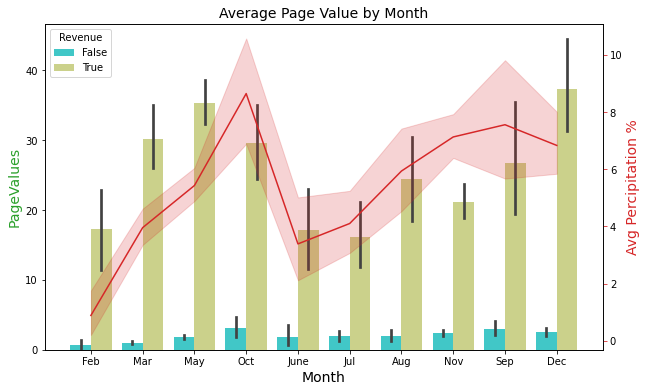

In [126]:
#visualize average page value vs month
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Page Value by Month', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Avg Temp', fontsize=14, color=color)
ax2 = sns.barplot(x='Month', y='PageValues', data = df, palette='rainbow',hue='Revenue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=14, color=color)
ax2 = sns.lineplot(x='Month', y='PageValues', data = df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

> Page value increased over months and is positively related to revenue

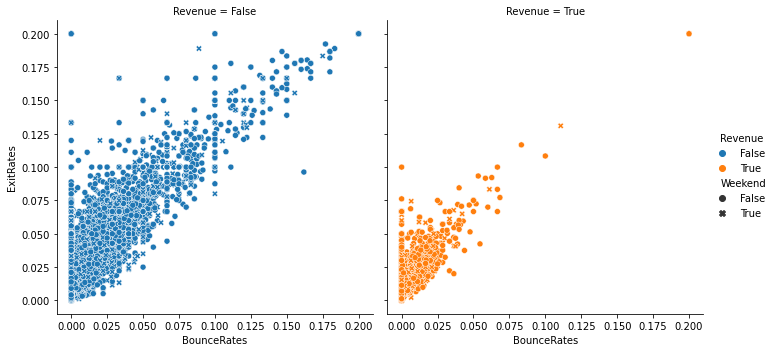

In [127]:
#visualize the above wrt revenue
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=df)

> Bounce and Exit Rates are inversely related to Revenue, so as revenue decreases, bounce and exit rates increase; data is imabalanced 


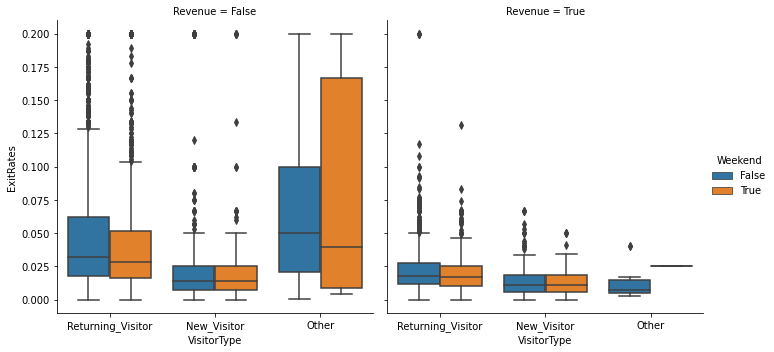

In [128]:
#visualize
sns.catplot(x="VisitorType", y="ExitRates",
                hue="Weekend", col="Revenue",
                data=df, kind="box");

> Exit rates are low when rrevenue is high
New visitors have low exit rates

> tell the company to design interactive apps and websites to engage customers

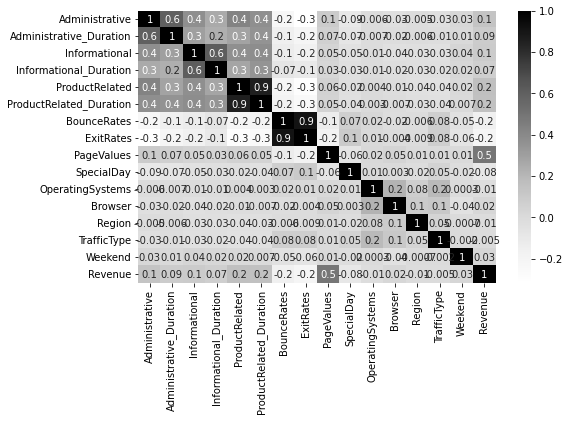

In [129]:
#correlation by heatmap
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='Greys')

> Page values are (0,5) correlated to revenue;

> Bounce rates are negatively related to revenue (-0.2)

> Bounce rates are highly positively correlated to Exit rates (0.9)  

> Product related pages are positively related to revenue (0.2)

In [130]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium'] 
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


> Summarizes the multivariate analyses

# Feature selection

- Feature selection
- Find and explain important features.



In [131]:
feature_customer=df.copy()

Text(0.5, 1.0, 'PageValues')

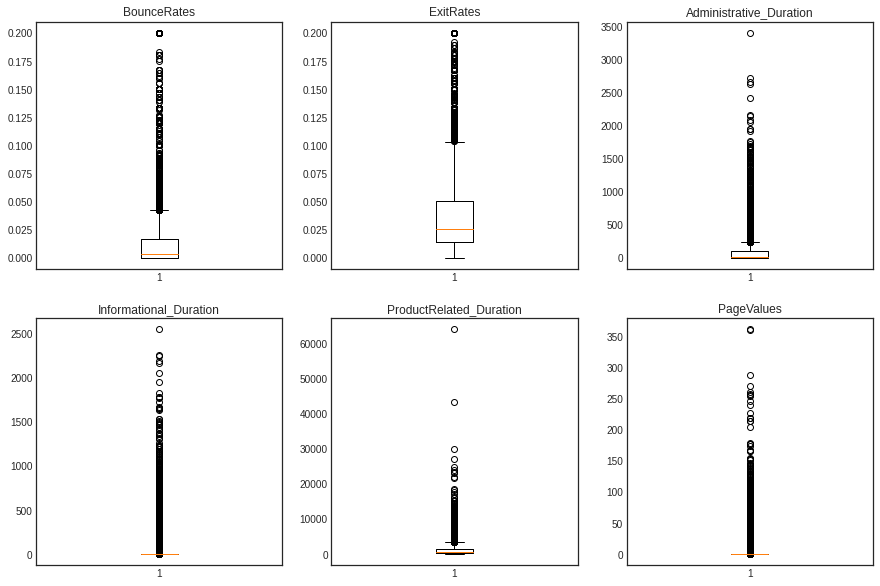

In [132]:
#remove outliers
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(feature_customer['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(feature_customer['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(feature_customer['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(feature_customer['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(feature_customer['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(feature_customer['PageValues'])
ax.set_title('PageValues')

Now we remove the outliers via IQR method by blocking everything outside teh Q1 and Q3 ranges 

In [133]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = feature_customer[cols].quantile(0.25)
    Q3 = feature_customer[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (feature_customer[cols] >= Q1 - 1.5 * IQR) & (feature_customer[cols] <= Q3 + 1.5 *IQR)
    feature_customer=feature_customer.loc[filter]

Text(0.5, 1.0, 'ProductRelated_Duration')

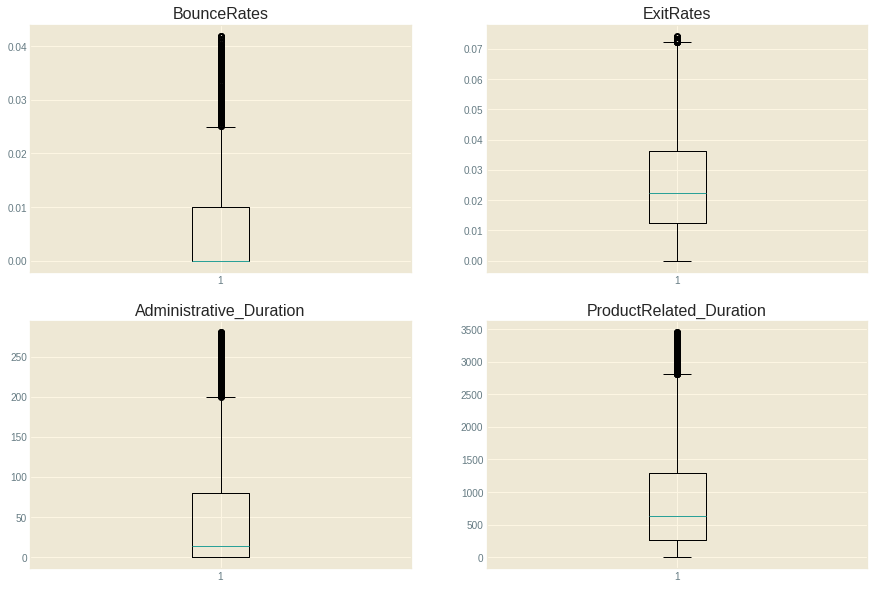

In [134]:
plt.figure(figsize = (15, 10))
plt.style.use('Solarize_Light2')
ax=plt.subplot(221)
plt.boxplot(feature_customer['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(feature_customer['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(feature_customer['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(feature_customer['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

Looks better, :)

In [135]:
#convert dataset types
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    feature_customer[cols] = feature_customer[cols].astype('category')

In [136]:
feature_customer.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

> To standardize categories, next scale the features to standardize these numerical categories using Standard Scaler by removing the mean and scaling to unit variance.

# Data processing & normalization

In [137]:
#scaling features
from sklearn.preprocessing import StandardScaler
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale=[feature for feature in feature_customer.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(feature_customer[feature_scale])

StandardScaler()

> We scale the features to normalize the range of independent variables  

In [138]:
scaled_data = pd.concat([feature_customer[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(feature_customer[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0,0,10,0.0,3,3,1,Feb,4,Returning_Visitor,-0.729479,-0.228638,-0.323099,1.425002,1.421103,-0.330977
1,False,False,0,0,19,0.0,2,2,1,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.917399,0.987920,-0.079715,-0.330977
2,False,False,0,0,3,0.4,2,4,1,Feb,2,Returning_Visitor,-0.729479,-0.228638,-0.184345,-0.651135,-0.217722,-0.330977
3,False,False,0,0,3,0.0,1,1,3,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.615048,-0.651135,2.404398,-0.330977
4,False,False,0,0,16,0.4,1,1,4,Feb,3,Returning_Visitor,-0.729479,-0.228638,-0.599038,1.295243,-0.004674,-0.330977


> Encoding with LabelEncoder to normalize the labels

In [139]:
#encoding
from sklearn import preprocessing
encoded_features=['Month','VisitorType']
label_data = scaled_data.copy()
label_encoder = preprocessing.LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])
    
label_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0,0,10,0.0,3,3,1,2,4,2,-0.729479,-0.228638,-0.323099,1.425002,1.421103,-0.330977
1,False,False,0,0,19,0.0,2,2,1,2,3,2,-0.729479,-0.228638,-0.917399,0.987920,-0.079715,-0.330977
2,False,False,0,0,3,0.4,2,4,1,2,2,2,-0.729479,-0.228638,-0.184345,-0.651135,-0.217722,-0.330977
3,False,False,0,0,3,0.0,1,1,3,2,3,2,-0.729479,-0.228638,-0.615048,-0.651135,2.404398,-0.330977
4,False,False,0,0,16,0.4,1,1,4,2,3,2,-0.729479,-0.228638,-0.599038,1.295243,-0.004674,-0.330977


> Normalized!

> Feature selection to filter out the important features

In [140]:
#feature selection
X=label_data.drop(['Revenue'],axis=1)
y=label_data.Revenue
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

> The ExtraTreesClassifier implements an estimator to fit decision trees with subsets of teh dataset and essentially averages to improve prediction accuracy by reducing overfitting

In [141]:
print(model.feature_importances_)

[0.01444812 0.04533994 0.02670651 0.05934384 0.00754305 0.031399
 0.03208371 0.04256968 0.0482922  0.04405862 0.01563286 0.04815134
 0.02608695 0.06732586 0.04280774 0.06781644 0.38039414]


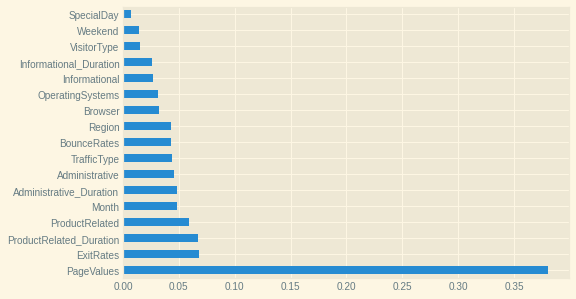

In [142]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

> now we have the important features

# Train/test split

- Training set: data entries corresponding to June—December 

- Test set: data entries corresponding to February—March   


In [143]:
#import resources for train and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [144]:
df = df.sort_values(by="Month") 

In [145]:
#dropping features as needed

X=label_data.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=label_data.Revenue

# Models
- Fit a logistic regression  

- Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set.


In [146]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=3, shuffle=False)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=100)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (7006, 14)
Input Test: (1752, 14)
Output Training: (7006,)
Output Test: (1752,)


> We have the shape of the sets

# Model fitting

In [148]:
#importing resources
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

> Use crossvalidation from sklearn to train and test the model over multiple folds to reduce overfitting

In [149]:
#crossvalidation
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
rt_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear')
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN',4:'SVC',5:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,rt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8839885192433137
Decision Tree Test Accuracy: 0.8577219830397912
RandomForest Test Accuracy: 0.8986057403783431
KNN Test Accuracy: 0.8489368558382256
SVC Test Accuracy: 0.8887836921069798
Naive Bayes Test Accuracy: 0.8852456621004567


> Random Forest at 89.9% % and Logistic Regression at 88.4%! RF in the lead

# Pipeline, Performance points

- Report and interpret the most meaningful classifications metrics



In [151]:
# Import resources
from sklearn.pipeline import Pipeline

In [152]:
# Generate pipeline
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier())])
pipeline_svc=Pipeline([('svc_classifier',SVC(kernel='linear'))])
pipeline_nb=Pipeline([('nb_classifier',BernoulliNB())])

# Assign pipeline  
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_svc,pipeline_nb]
best_accuracy=0.0
best_classifier=0
best_pipeline=""

# Dictionary of pipelines  
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN',4:'SVC',5:'Naive Bayes'}

# Fit pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

#Evaluate models
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8732876712328768
Decision Tree Test Accuracy: 0.860730593607306
RandomForest Test Accuracy: 0.9001141552511416
KNN Test Accuracy: 0.8401826484018264
SVC Test Accuracy: 0.8767123287671232
Naive Bayes Test Accuracy: 0.8715753424657534


> Random Forest 89% and Naive Byes 89% and SVC 88% have highest accuracies

In [153]:
# Select best model  
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


# Show and explain the hyper-parameter fitting process.

List parameters

In [154]:
# Create a pipeline for RFC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [155]:
print(best_model.best_estimator_)
print("The models has a mean accuracy of:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=5))])
The models has a mean accuracy of: 0.8767123287671232


> Mean accuracy is 87.6% 

In [156]:
rt=RandomForestClassifier(max_depth=30, max_leaf_nodes=10,min_samples_leaf=15)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8898401826484018


> Random Forest accuracy at 88.9%

In [157]:
#SVC model classification report
svc_classifier = SVC(kernel='linear',random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8767123287671232
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      1445
        True       0.75      0.45      0.56       307

    accuracy                           0.88      1752
   macro avg       0.82      0.71      0.74      1752
weighted avg       0.87      0.88      0.86      1752



> SVC accuraccy 87.6% 

In [ ]:
#statistics
import scipy.stats as stats
for i in df.columns:
    df0 = df[df['Revenue']=='Yes'][i]
    df1 = df[df['Revenue']=='No'][i]
    print(i)
    print('Pvalue:',stats.ttest_ind(df0,df1)[1])
    print()
    
#All numerical columns in the data are statistically significant

Administrative
Pvalue: nan

Administrative_Duration
Pvalue: nan

Informational
Pvalue: nan

Informational_Duration
Pvalue: nan

ProductRelated
Pvalue: nan

ProductRelated_Duration
Pvalue: nan

BounceRates
Pvalue: nan

ExitRates
Pvalue: nan

PageValues
Pvalue: nan

SpecialDay
Pvalue: nan

Month
Pvalue: nan

OperatingSystems
Pvalue: nan

Browser
Pvalue: nan

Region
Pvalue: nan

TrafficType
Pvalue: nan

VisitorType
Pvalue: nan

Weekend
Pvalue: nan

Revenue
Pvalue: nan



> # **START TASK 2**

**Task 2. Customer Segmentation (25 points)**
- Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

- How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. 

- Perform as detailed analysis of the clusters as you can.

- Return plots and cluster images generated for the data.

- Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

**Point breakdown:**

(15 points) Clustering code
(10 points) Clustering analysis

# Clustering code

> Using KMeans to explore clusters in dataset

Dataset has shape:  (12330, 2)


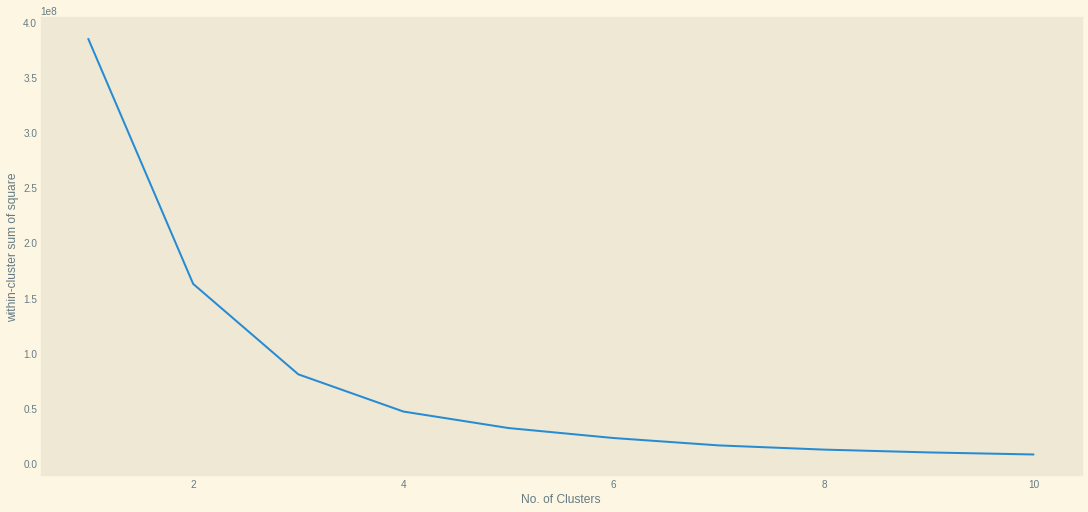

In [158]:
# Administrative duration + bounce Rates wrt to dataset clusters.

x = df.iloc[:, [1, 6]].values

# Data shape  
print("Dataset has shape: ", x.shape)

#Import resource
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10, 
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

> use the Elbow method to determine how many clusters are in the dataset

> plot the explained variation as a function of the total clusters; and picking the elbow of the curve as the number of clusters to use.

> There are 3 optimal clusters for Administrative Duration and Revenue  
 

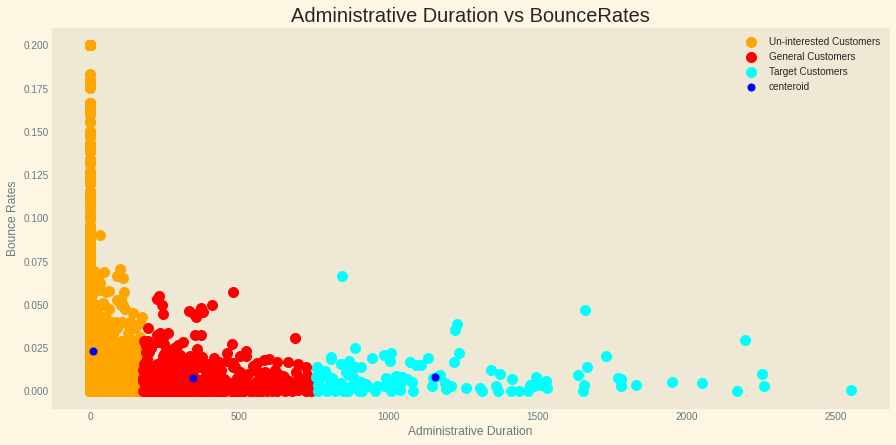

In [161]:
#visualize clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

> Uninterested customers in orange, general customers in red, light blue is target customers and dark blue circles are the centroids

> More time spent in Administrative duration on the site means less bouncing away from the website 


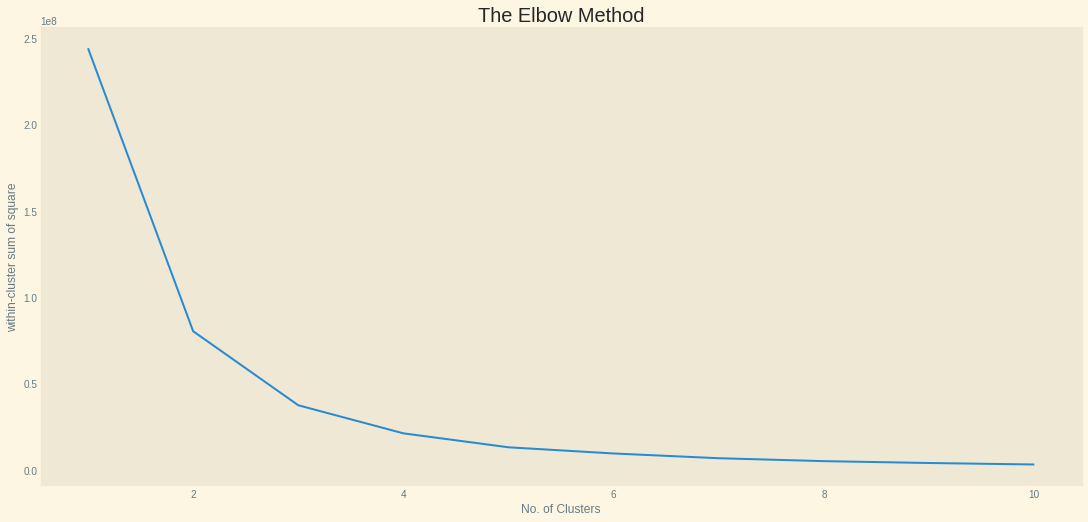

In [162]:
# Informational Duration vs Bounce Rates
x = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

> 2 is optimal number of clusters for Informational Duration and for Revenue (as seen by the sharp bend at 2

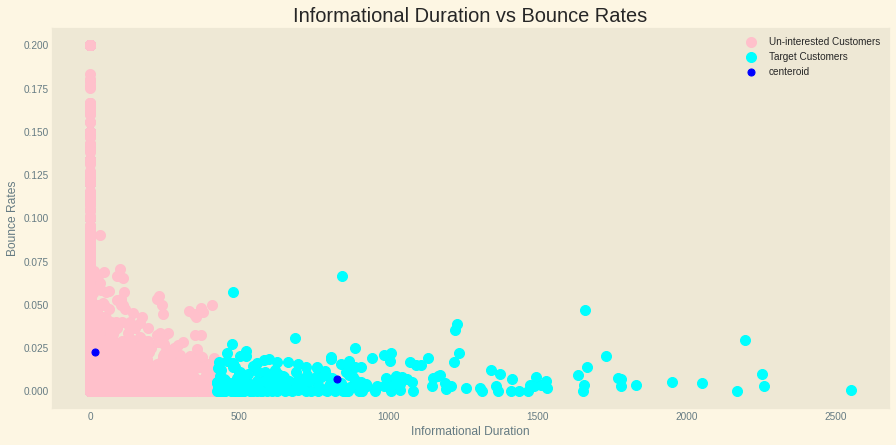

In [163]:
# Visualize Clusters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

> Uninterested customers in pink (shortest duration on info pages and higer bounce away rates), target customers in light blue

> dark blue circles represent the centroids
Informational duration pages lead to less bbouncing away from teh site; 

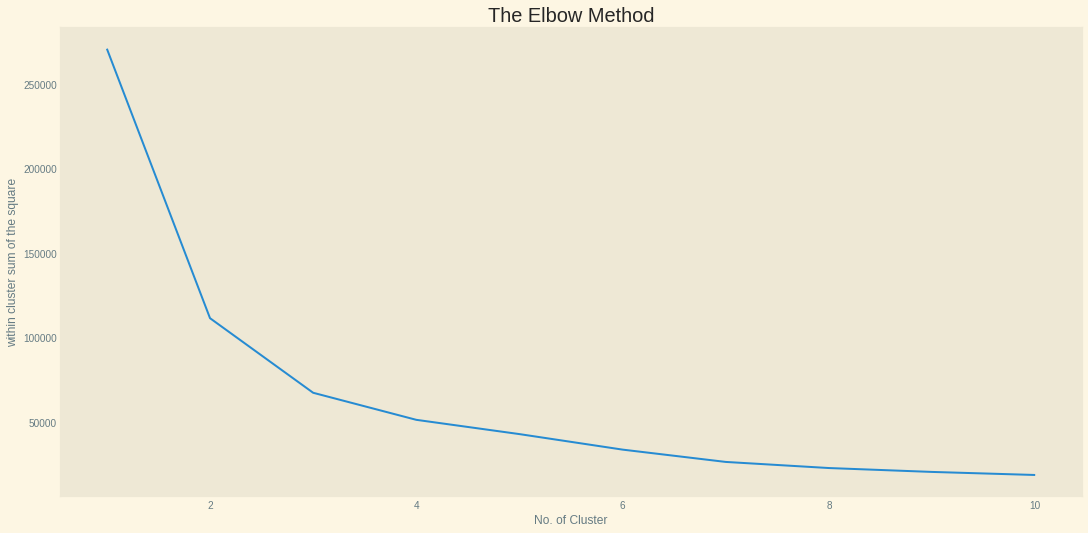

In [164]:
# Region vs TrafficType  
x = df.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('within cluster sum of the square')
plt.show()

> again 2 is optimal for region and TrafficType

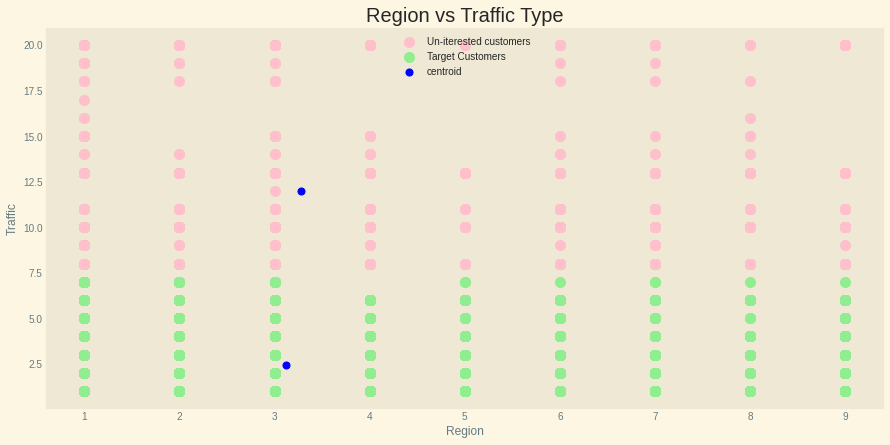

In [165]:
# Visualize Clusters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-iterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()
plt.show()


> Regions 2, 4 and 5 have least Traffic

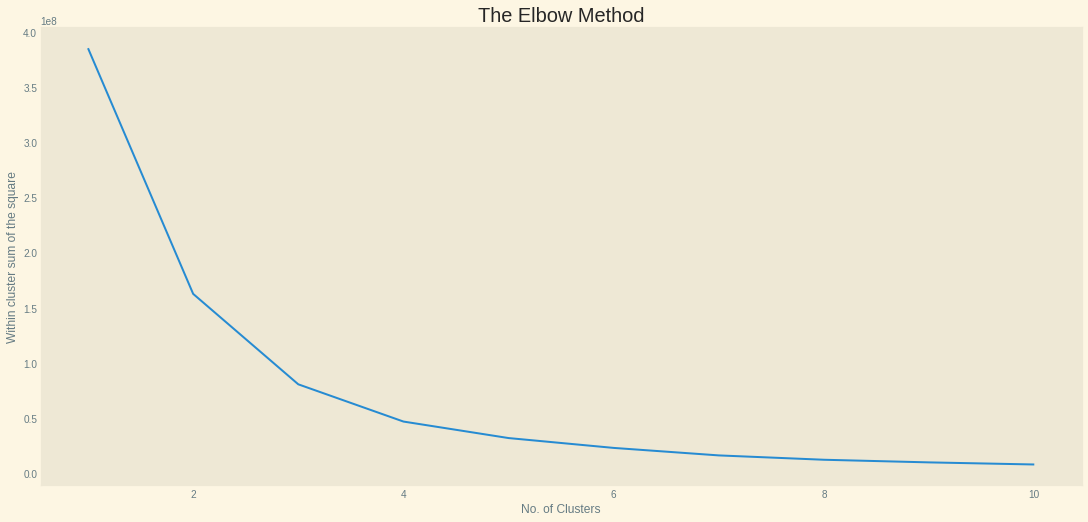

In [166]:
# administrative duration vs bounce rates
x = df.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

> 2 is optimal cluster number for Admin_Duration an dfor Bounce Rates

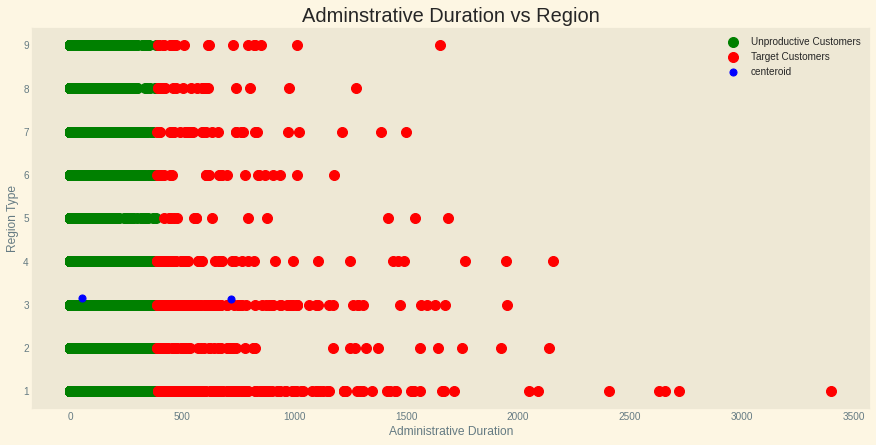

In [167]:
# Visualize Clusters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

> customers who spend time on admin pages are not from regions 2 or 4

> # **START TASK 3**

**Task 3. Semi-Supervised Learning (15 points)**
- Consider you have training data with the Revenue attribute for records from June—September only. 

- For all records from October—December, however, Revenue attribute is missing. 

- Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

- If you do not consider the records from October—December, generate the classification performance on test data

- After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

**Point breakdown:**

( 2 points) Correctly splits the data by month into labeled, unlabeled, and test
(8 points) Generate labels for unlabeled samples with a self labeling technique
(5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels
Style and clarity (10 points).
Write clear, readable, well-commented code following PEP8; also include explanations in markdown cells, where appropriate.

# Data Processing

In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import resources and then define the datase and print 
import pandas as pd
import io
df = pd.read_csv('/content/drive/MyDrive/4thbrain/online_shoppers_intention.csv')
print(df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [168]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7427,0,0.000000,0,0.0,75,2532.960656,0.004267,0.030749,0.000000,0.0,Aug,1,6,1,1,Returning_Visitor,False,False
7031,0,0.000000,0,0.0,18,345.120000,0.044444,0.072222,0.000000,0.0,Aug,2,2,3,13,Returning_Visitor,False,False
7036,13,345.016667,0,0.0,90,1816.555008,0.000000,0.004861,86.310343,0.0,Aug,4,2,3,4,Returning_Visitor,False,False
7665,0,0.000000,0,0.0,2,11.000000,0.000000,0.100000,0.000000,0.0,Aug,3,2,1,4,Returning_Visitor,False,False
7039,11,373.620000,9,322.8,191,3677.258176,0.009106,0.024304,0.000000,0.0,Aug,2,2,6,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,0,0.000000,0,0.0,80,1566.333333,0.005000,0.027917,0.720181,0.0,Sep,2,2,6,1,Returning_Visitor,False,True
6335,2,43.200000,1,32.2,202,13842.458330,0.018049,0.050156,0.000000,0.0,Sep,2,4,7,1,Returning_Visitor,False,False
6334,0,0.000000,0,0.0,37,856.200000,0.052252,0.108559,0.000000,0.0,Sep,2,2,2,1,Returning_Visitor,False,False
5521,1,10.000000,0,0.0,5,354.900000,0.000000,0.060000,0.000000,0.0,Sep,2,2,5,1,Returning_Visitor,False,False


In [169]:
#Import Resources 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [170]:
# analyse data
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)

# of features in dataset are = 18
# of samples in dataset are = 12330
Features of data set are = Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Feature datatypes are= Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Visito

In [171]:
# Make 'Month' into numerical variable
train_month_col = ['June', 'Jul','Aug','Sep']
test_month_col = ['Oct','Nov','Dec']
train_df = df[df['Month'].isin(train_month_col)]
test_df = df[df['Month'].isin(test_month_col)]
print("Train data set shape after labeling=", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("Before labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("Before labeling test data set months/counts=\n",test_df.Month.value_counts())
print()
train_month_num = [6,7,8,9]
test_month_num =[10,11,12]
train_df['Month'] = train_df['Month'].replace(train_month_col, train_month_num)
test_df['Month'] = test_df['Month'].replace(test_month_col, test_month_num)
print("Train data set shape after labeling=\n", train_df.shape)
print("Test data set shape after labeling=", test_df.shape)
print()
print("After labeling train data set months/counts=\n",train_df.Month.value_counts())
print()
print("After labeling test data set months/counts=\n",test_df.Month.value_counts())

Train data set shape after labeling= (1601, 18)
Test data set shape after labeling= (5274, 18)

Before labeling train data set months/counts=
 Sep     448
Aug     433
Jul     432
June    288
Name: Month, dtype: int64

Before labeling test data set months/counts=
 Nov    2998
Dec    1727
Oct     549
Name: Month, dtype: int64

Train data set shape after labeling=
 (1601, 18)
Test data set shape after labeling= (5274, 18)

After labeling train data set months/counts=
 9    448
8    433
7    432
6    288
Name: Month, dtype: int64

After labeling test data set months/counts=
 11    2998
12    1727
10     549
Name: Month, dtype: int64


In [172]:
test2_month_col = ['Feb','Mar']
test2_df = df[df['Month'].isin(test2_month_col)]
print("Test data#2 set shape before labeling=", test2_df.shape)
print()
print("Before labeling test data#2 set months/counts=\n",test2_df.Month.value_counts())
print()

test2_month_num =[2,3]
test2_df['Month'] = test2_df['Month'].replace(test2_month_col, test2_month_num)

print("Test data#2 set shape after labeling=", test2_df.shape)
print()
print("After labeling test data#2 set months/counts=\n",test2_df.Month.value_counts())

Test data#2 set shape before labeling= (2091, 18)

Before labeling test data#2 set months/counts=
 Mar    1907
Feb     184
Name: Month, dtype: int64

Test data#2 set shape after labeling= (2091, 18)

After labeling test data#2 set months/counts=
 3    1907
2     184
Name: Month, dtype: int64


In [173]:
# For 'Visitor_type'
visitor_type = ['Returning_Visitor', 'New_Visitor', 'Other']
print("Before labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("Before labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()
train_df['VisitorType'] = train_df['VisitorType'].replace(visitor_type, [0,1,2])
test_df['VisitorType'] = test_df['VisitorType'].replace(visitor_type, [0,1,2])
print("After labeling train data set VisitorType/counts=\n",train_df.VisitorType.value_counts())
print()
print("After labeling test data set VisitorType/counts=\n",test_df.VisitorType.value_counts())
print()
# for task3 part2 test data
print("Before labeling test data set#2 VisitorType/counts=\n",test2_df.VisitorType.value_counts())
print()
test2_df['VisitorType'] = test2_df['VisitorType'].replace(visitor_type, [0,1,2])
print("After labeling test data#2 set VisitorType/counts=\n",test2_df.VisitorType.value_counts())
print()

Before labeling train data set VisitorType/counts=
 Returning_Visitor    1336
New_Visitor           264
Other                   1
Name: VisitorType, dtype: int64

Before labeling test data set VisitorType/counts=
 Returning_Visitor    4312
New_Visitor           878
Other                  84
Name: VisitorType, dtype: int64

After labeling train data set VisitorType/counts=
 0    1336
1     264
2       1
Name: VisitorType, dtype: int64

After labeling test data set VisitorType/counts=
 0    4312
1     878
2      84
Name: VisitorType, dtype: int64

Before labeling test data set#2 VisitorType/counts=
 Returning_Visitor    1858
New_Visitor           233
Name: VisitorType, dtype: int64

After labeling test data#2 set VisitorType/counts=
 0    1858
1     233
Name: VisitorType, dtype: int64



In [174]:
non_numeric_columns = list(df.select_dtypes(include='object'))
print("Non-numeric columns are=",non_numeric_columns)        
bool_columns = list(df.select_dtypes(include='bool'))
print("Boolean columns are=", bool_columns)    
for col in non_numeric_columns:
   print("Non-numeric columns are=\n",  df[col].value_counts())
for col in bool_columns:
   print("Boolean columns are=\n",  df[col].value_counts())

Non-numeric columns are= ['Month', 'VisitorType']
Boolean columns are= ['Weekend', 'Revenue']
Non-numeric columns are=
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Non-numeric columns are=
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Boolean columns are=
 False    9462
True     2868
Name: Weekend, dtype: int64
Boolean columns are=
 False    10422
True      1908
Name: Revenue, dtype: int64


In [175]:
# For 'Weekend' and 'Revenue'
for col in bool_columns:
  print(f"Before labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"Before labeling test data set {col}/counts=\n",test_df[col].value_counts())
  print(f"Before labeling test data#2 set {col}/counts=\n",test2_df[col].value_counts())
  

for col in bool_columns:
  train_df[col] = train_df[col] * 1
  test_df[col] = test_df[col] * 1
  test2_df[col] = test2_df[col] * 1

for col in bool_columns:
  print(f"After labeling train data set {col}/counts=\n",train_df[col].value_counts())
  print(f"After labeling test data set {col}/counts=\n",test_df[col].value_counts())
  print(f"After labeling test data#2 set {col}/counts=\n",test2_df[col].value_counts())


Before labeling train data set Weekend/counts=
 False    1258
True      343
Name: Weekend, dtype: int64
Before labeling test data set Weekend/counts=
 False    3973
True     1301
Name: Weekend, dtype: int64
Before labeling test data#2 set Weekend/counts=
 False    1582
True      509
Name: Weekend, dtype: int64
Before labeling train data set Revenue/counts=
 False    1344
True      257
Name: Revenue, dtype: int64
Before labeling test data set Revenue/counts=
 False    4183
True     1091
Name: Revenue, dtype: int64
Before labeling test data#2 set Revenue/counts=
 False    1896
True      195
Name: Revenue, dtype: int64
After labeling train data set Weekend/counts=
 0    1258
1     343
Name: Weekend, dtype: int64
After labeling test data set Weekend/counts=
 0    3973
1    1301
Name: Weekend, dtype: int64
After labeling test data#2 set Weekend/counts=
 0    1582
1     509
Name: Weekend, dtype: int64
After labeling train data set Revenue/counts=
 0    1344
1     257
Name: Revenue, dtype: in

In [176]:
print("Training dataset after converting features to numeric datatypes=\n", train_df.dtypes)
print("Test dataset after converting features to numeric datatypes=\n", test_df.dtypes)
print("Test second dataset after converting features to numeric datatypes=\n", test2_df.dtypes)
print("Features in training dataset =\n", train_df.columns)
print("Features in test dataset =\n", test_df.columns)
print("Features in test second dataset =\n", test_df.columns)

Training dataset after converting features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object
Test dataset after converting features to numeric datatypes=
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates       

# Data split

- splits the data by month into labeled, unlabeled, and test

In [177]:
# Training and test data shape
print("Size of the training dataset is=\n",train_df.shape, "# of samples=", train_df.shape[0], '# of features=', train_df.shape[1])
print("Size in test dataset is=\n", test_df.shape, ' # of samples=', test_df.shape[0], '# of features=', test_df.shape[1])
print("Size in test dataset#2 is=\n", test2_df.shape, ' # of samples=', test2_df.shape[0], '# of features=', test2_df.shape[1])

Size of the training dataset is=
 (1601, 18) # of samples= 1601 # of features= 18
Size in test dataset is=
 (5274, 18)  # of samples= 5274 # of features= 18
Size in test dataset#2 is=
 (2091, 18)  # of samples= 2091 # of features= 18


In [178]:
# First test dataset | Months 10 through 12  
train_arr_x = train_df.drop(columns=['Revenue']).values
train_arr_y = train_df.Revenue.values.reshape((-1,1))
test_arr_x = test_df.drop(columns=['Revenue']).values
test_arr_y = test_df.Revenue.values.reshape((-1,1))
print(train_arr_x.shape,train_arr_y.shape,test_arr_x.shape,test_arr_y.shape)


(1601, 17) (1601, 1) (5274, 17) (5274, 1)


In [179]:
# Second test dataset | Months 2 through 3  
test2_arr_x = test2_df.drop(columns=['Revenue']).values
test2_arr_y = test2_df.Revenue.values.reshape((-1,1))
print(train_arr_x.shape,train_arr_y.shape,test2_arr_x.shape,test2_arr_y.shape)

(1601, 17) (1601, 1) (2091, 17) (2091, 1)


# Generate labels for unlabeled samples with a self labeling technique


In [180]:
rng = np.random.RandomState(2)
indices = np.arange(len(train_arr_x))
#Shuffle
rng.shuffle(indices)

# Combine dataset inputs
X_train_mixed = np.concatenate((train_arr_x[indices],test_arr_x[indices]))

y_test_arr_nlab = test_arr_y[indices]  
no_label = np.full((len(indices),1),-1)

# Assign -1 representing the unknown labels of test data
y_test_arr_unlab = np.copy(no_label)

#y_test_arr_unlab = np.concatenate((y_test_arr_nlab[0:1000],no_label)) #1000 labeled and unlabeled each
print(y_test_arr_nlab.shape, no_label.shape,y_test_arr_unlab.shape)
# Train and unlabeled test dataset labels  
y_train_mixed = np.concatenate((train_arr_y[indices],y_test_arr_unlab))
# All labels
y_train_act_mixed = np.concatenate((train_arr_y[indices],test_arr_y[indices]))
print(X_train_mixed.shape,y_train_mixed.shape,y_train_act_mixed.shape)
X_test = np.copy(test_arr_x[indices])
print(np.unique(y_test_arr_nlab))
print(X_test.shape)

(1601, 1) (1601, 1) (1601, 1)
(3202, 17) (3202, 1) (3202, 1)
[0 1]
(1601, 17)


In [181]:
print(test_arr_x.shape,test_arr_y.shape)

(5274, 17) (5274, 1)


In [182]:
# Import resources
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

# Model
Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

If you do not consider the records from October—December, generate the classification performance on test data

Prediction Score with limited test data= 0.8969394128669581
Result
Prediction score of the classifier= 0.7986348122866894
Confusion Matrix=
 [[4179    4]
 [1058   33]]
Classification Report=
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4183
           1       0.89      0.03      0.06      1091

    accuracy                           0.80      5274
   macro avg       0.84      0.51      0.47      5274
weighted avg       0.82      0.80      0.72      5274

[[4179    4]
 [1058   33]]


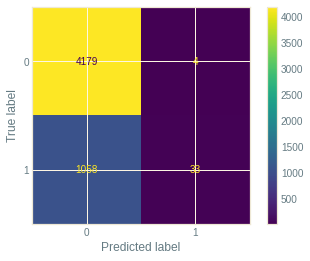

In [183]:
#Label propogation
model = LabelSpreading()
model.fit(X_train_mixed,y_train_mixed)
#Obtain labels
tran_labels = model.transduction_
#Scale datasets
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_mixed)
X_test_scale = scaler.fit_transform(X_test)

#Scale dataset full
X_test_full_scale = scaler.fit_transform(test_arr_x)

#Fit classifier with labeled data 
model2 = LogisticRegression()
lr_lab_fit = model2.fit(X_train_scale,tran_labels)
yhat = lr_lab_fit.predict(X_test_scale)
score = accuracy_score(y_test_arr_nlab,yhat)
print("Prediction Score with limited test data=",score)
print("Result")

#Predict for test dataset  
yhat_full = lr_lab_fit.predict(X_test_full_scale)
score_full = accuracy_score(test_arr_y,yhat_full)
print("Prediction score of the classifier=", score_full)
print("Confusion Matrix=\n", confusion_matrix(test_arr_y,yhat_full))
print("Classification Report=\n", classification_report(test_arr_y,yhat_full))
disp = plot_confusion_matrix(lr_lab_fit,X_test_full_scale,test_arr_y)
print(disp.confusion_matrix)

In [184]:
print(X_train_scale.shape,train_arr_y.shape)

(3202, 17) (1601, 1)


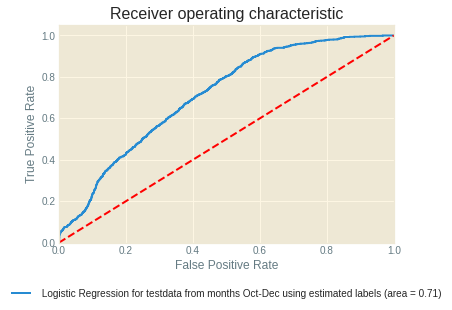

In [185]:
probs = lr_lab_fit.predict_proba(X_test_full_scale)
preds_lr_lab_fit = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_arr_y, preds_lr_lab_fit)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Oct-Dec using estimated labels (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

Prediction Score with limited test data and actual labels= 0.8988132417239225
Result
Prediction score of the classifier with actual labels= 0.8156996587030717
Confusion Matrix=
 [[4160   23]
 [ 949  142]]
Classification Report=
               precision    recall  f1-score   support

           0       0.81      0.99      0.90      4183
           1       0.86      0.13      0.23      1091

    accuracy                           0.82      5274
   macro avg       0.84      0.56      0.56      5274
weighted avg       0.82      0.82      0.76      5274

[[4160   23]
 [ 949  142]]


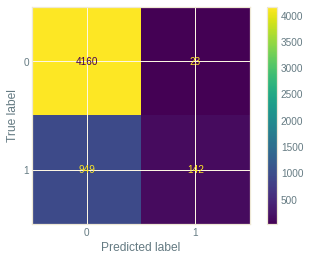

In [186]:
#Fitting Classifier using the actual labeled data 
model3 = LogisticRegression()
lr_act_fit = model3.fit(X_train_scale, y_train_act_mixed)
yhat_act = lr_act_fit.predict(X_test_scale)
score_act = accuracy_score(y_test_arr_nlab,yhat_act)
print("Prediction Score with limited test data and actual labels=",score_act)
print("Result")
#Prediction For the entire test dataset (with the model fitted with 1601 elements as above w.r.t train data set size)
yhat_act_full = lr_act_fit.predict(X_test_full_scale)
score_act_full = accuracy_score(test_arr_y,yhat_act_full)
print("Prediction score of the classifier with actual labels=", score_act_full)
print("Confusion Matrix=\n", confusion_matrix(test_arr_y,yhat_act_full))
print("Classification Report=\n", classification_report(test_arr_y,yhat_act_full))
disp = plot_confusion_matrix(lr_act_fit,X_test_full_scale,test_arr_y)
print(disp.confusion_matrix)

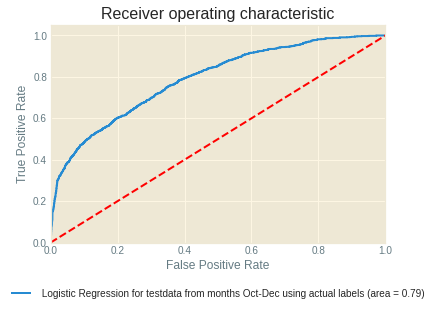

In [187]:
probs = lr_act_fit.predict_proba(X_test_full_scale)
preds_lr_act_fit = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_arr_y, preds_lr_act_fit)
roc_auc_act = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Oct-Dec using actual labels (area = %0.2f)' % roc_auc_act)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

# Semi supervised labelling for second dataset

In [188]:
rng = np.random.RandomState(2)
indices = np.arange(len(train_arr_x))
#Shuffling the elements 
rng.shuffle(indices)
X_train_mixed = np.concatenate((train_arr_x[indices],test2_arr_x[indices]))

y_test2_arr_nlab = test2_arr_y[indices] # y_test which is going to be unlabeled
no_label = np.full((len(indices),1),-1)
y_test2_arr_unlab = np.copy(no_label)
#y_test_arr_unlab = np.concatenate((y_test_arr_nlab[0:1000],no_label)) #1000 are labeled, 1000 are unlabeled
print(y_test2_arr_nlab.shape, no_label.shape,y_test2_arr_unlab.shape)

y_train_mixed = np.concatenate((train_arr_y[indices],y_test2_arr_unlab))
#contains all actual labels
y_train_act_mixed = np.concatenate((train_arr_y[indices],test2_arr_y[indices]))
print(X_train_mixed.shape,y_train_mixed.shape)
X_test2 = np.copy(test2_arr_x[indices])
print(np.unique(y_test2_arr_nlab))
print(X_test2.shape)

(1601, 1) (1601, 1) (1601, 1)
(3202, 17) (3202, 1)
[0 1]
(1601, 17)


Prediction Score with limited test data set # 2= 0.9269206745783886
Result
Prediction score of the classifier= 0.9273075083692014
Confusion Matrix=
 [[1891    5]
 [ 147   48]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1896
           1       0.91      0.25      0.39       195

    accuracy                           0.93      2091
   macro avg       0.92      0.62      0.67      2091
weighted avg       0.93      0.93      0.91      2091

[[1891    5]
 [ 147   48]]
Accuracy = 0.9273075083692014, Precision = 0.9056603773584906, Recall = 0.24615384615384617, F1-score = 0.3870967741935484


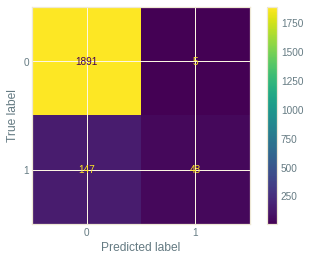

In [189]:
#Label propogation  
model4 = LabelSpreading()
model4.fit(X_train_mixed,y_train_mixed)
#Obtain labels
tran_labels = model4.transduction_

#Scale datasets
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train_mixed)
X_test2_scale = scaler.fit_transform(X_test2)

#Scale test dataset
X_test2_full_scale = scaler.fit_transform(test2_arr_x)
#Fit Classifier
model5 = LogisticRegression()
lr_lab_fit2 = model5.fit(X_train_scale,tran_labels)
yhat2 = lr_lab_fit2.predict(X_test2_scale)
score2 = accuracy_score(y_test2_arr_nlab,yhat2)
print("Prediction Score with limited test data set # 2=",score2)
print("Result")
#Predict for second test dataset  
yhat2_full = lr_lab_fit2.predict(X_test2_full_scale)
score2_full = accuracy_score(test2_arr_y,yhat2_full)
print("Prediction score of the classifier=", score2_full)
print("Confusion Matrix=\n", confusion_matrix(test2_arr_y,yhat2_full))
print("Classification Report=\n", classification_report(test2_arr_y,yhat2_full))
disp2 = plot_confusion_matrix(lr_lab_fit2,X_test2_full_scale,test2_arr_y)
print(disp2.confusion_matrix)
acc   = accuracy(test2_arr_y, yhat2_full)
rec   = recall(test2_arr_y, yhat2_full)
prec  = precision(test2_arr_y, yhat2_full)
f1    = f1_score(test2_arr_y, yhat2_full)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

In [190]:
print(X_train_scale.shape,test2_arr_y.shape)

(3202, 17) (2091, 1)


# Compare and contrast performance difference on test dataset between labels only and labels & self-labels

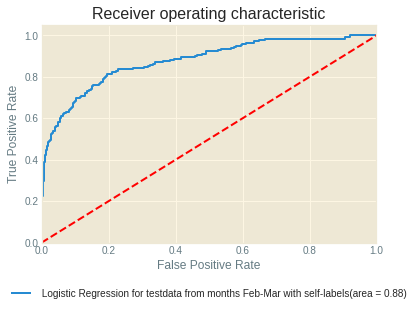

In [191]:
probs = lr_lab_fit2.predict_proba(X_test2_full_scale)
preds_lr_lab_fit2 = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test2_arr_y, preds_lr_lab_fit2)
roc_auc2 = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Feb-Mar with self-labels(area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

Prediction Score with limited test data and actual labels= 0.929419113054341
Result
Prediction score of the classifier with actual labels= 0.9301769488283118
Confusion Matrix=
 [[1883   13]
 [ 133   62]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1896
           1       0.83      0.32      0.46       195

    accuracy                           0.93      2091
   macro avg       0.88      0.66      0.71      2091
weighted avg       0.92      0.93      0.92      2091

[[1883   13]
 [ 133   62]]


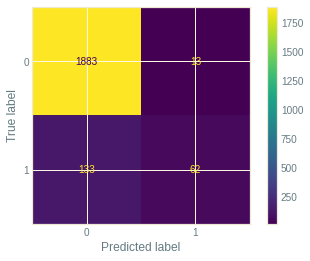

In [192]:
#Fit classifier with labeled data 
model6 = LogisticRegression()
lr_act_fit2 = model6.fit(X_train_scale, y_train_act_mixed)
yhat2_act = lr_act_fit2.predict(X_test2_scale)
score2_act = accuracy_score(y_test2_arr_nlab,yhat2_act)
print("Prediction Score with limited test data and actual labels=",score2_act)
print("Result")
#Predict for test dataset  
yhat2_act_full = lr_act_fit2.predict(X_test2_full_scale)
score2_act_full = accuracy_score(test2_arr_y,yhat2_act_full)
print("Prediction score of the classifier with actual labels=", score2_act_full)
print("Confusion Matrix=\n", confusion_matrix(test2_arr_y,yhat2_act_full))
print("Classification Report=\n", classification_report(test2_arr_y,yhat2_act_full))
disp = plot_confusion_matrix(lr_act_fit2,X_test2_full_scale,test2_arr_y)
print(disp.confusion_matrix)

Classification Report

TN / True Negative: when a case was negative and predicted negative
TP / True Positive: when a case was positive and predicted positive
FN / False Negative: when a case was positive but predicted negative
FP / False Positive: when a case was negative but predicted positive

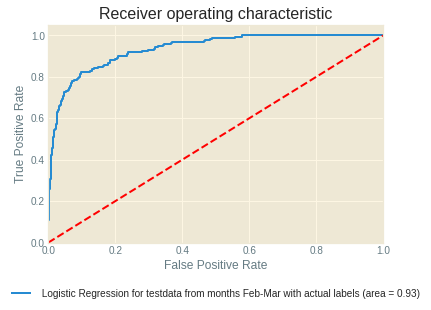

In [193]:
probs = lr_act_fit2.predict_proba(X_test2_full_scale)
preds_lr_act_fit2 = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test2_arr_y, preds_lr_act_fit2)
roc_auc2_act = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=' Logistic Regression for testdata from months Feb-Mar with actual labels (area = %0.2f)' % roc_auc2_act)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.3),ncol=2)
plt.savefig('Log_ROC')
plt.show()

> # **DISCUSSIONS AND CONCLUSIONS**

- After using the self-labeled data and training data together, does the classification performance on test data improve? 

- Discuss which metrics are most important for your conclusion.

In [194]:
data = {
    'accuracy': [accuracy(test2_arr_y, yhat2_full),accuracy(test2_arr_y, yhat2_act_full) ],
    'precision': [precision(test2_arr_y, yhat2_full),precision(test2_arr_y, yhat2_act_full) ],
    'recall': [ recall(test2_arr_y, yhat2_full), recall(test2_arr_y, yhat2_act_full)],
    'f1 score': [f1_score(test2_arr_y, yhat2_full),f1_score(test2_arr_y, yhat2_act_full) ],
    'roc_auc': [roc_auc2,roc_auc2_act]
}

print("Results: Feb-March dataset with vs without self-labels i.e.actual labels")
pd.DataFrame.from_dict(data, orient='index', columns=['self-labeled','actual labels'])

Results: Feb-March dataset with vs without self-labels i.e.actual labels


,self-labeled,actual labels
accuracy,0.927308,0.930177
precision,0.905660,0.826667
recall,0.246154,0.317949
f1 score,0.387097,0.459259
roc_auc,0.877359,0.933891


> Self labels gives a ROCAUC of 87% vs actual labels giving 93% 

> therefore the classifier is good and loses 5% using self labelled data 


In [195]:
# Classification with and without labels
data = {
    'accuracy': [accuracy(test_arr_y, yhat_full),accuracy(test_arr_y, yhat_act_full) ],
    'precision': [precision(test_arr_y, yhat_full),precision(test_arr_y, yhat_act_full) ],
    'recall': [ recall(test_arr_y, yhat_full), recall(test_arr_y, yhat_act_full)],
    'f1 score': [f1_score(test_arr_y, yhat_full),f1_score(test_arr_y, yhat_act_full) ],
    'roc_auc': [roc_auc,roc_auc_act]
}

print("Results: Oct-Dec dataset with vs without self-labels i.e.actual labels")
pd.DataFrame.from_dict(data, orient='index', columns=['self-labeled','actual labels'])

Results: Oct-Dec dataset with vs without self-labels i.e.actual labels


,self-labeled,actual labels
accuracy,0.798635,0.815700
precision,0.891892,0.860606
recall,0.030247,0.130156
f1 score,0.058511,0.226115
roc_auc,0.709730,0.788621


> Self-labels produces a ROCAUC of 70.9% whereas with actual labels it is 78.8% 

> both are poor but label spreading works

> I would have liked to try XGBoost on teh data.


> # **REFERENCES**

Elbow Method for optimal value of k in KMeans. https://www.geeksforgeeks.org/ Last Updated : 22 Aug, 2022 elbow-method-for-optimal-value-of-k-in-kmeans/ 

KAUSTUBHCS. https://github.com/kaustubhcs/kcluster

Mutukrishnan. 2018. Understanding the Classification report through sklearn. https://muthu.co/understanding-the-classification-report-in-sklearn/

Radečić D. 2021. Time Series From Scratch — Train/Test Splits and Evaluation Metrics. https://towardsdatascience.com/time-series-from-scratch-train-test-splits-and-evaluation-metrics-4fd654de1b37#:~:text=Conclusion-,Train%2Ftest%20splits%20in%20time%20series,and%20everything%20else%20for%20training.

Rawat D. 2019. The first step towards Data Science
Basic Concepts involved in Multivariate Analysis
https://medium.com/@shubhankarrawatsam.1999/introduction-to-data-analysis-basic-concepts-involved-in-multivariate-analysis-4295cc125052

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link]

Selveraj N. 2022. Pyspark Tutorial: Getting Started with Pyspark https://www.datacamp.com/tutorial/pyspark-tutorial-getting-started-with-pyspark Aug 2022

sklearn.ensemble.RandomForestClassifier¶ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



# Thank you!

January 9, 2023
Dr. Shai
Fourthbrain MLE 10 Cohort

✅